# Python for Data Science

Exercise to analyse, visualize and present gapminder dataset.
## Instructions
To complete the miniproject, create an analysis in jupyter-notebook which does the following:

For each question, you should generate summary visualizations (preferrably interactive ones) that demonstrate your answer to each question.

Additionally, the analysis must be user-friendly for a non-programmer and should intuitively convey the insights you uncovered. Use markdown to ensure that the text is organized and readable. The notebook should also be friendly for a non-programmer to read.

All code should be commited using git and pushed to your fork of the training repo on GitHub. Once you are done, let Henry know and he will check your notebook.

## Load libraries

## The below libraries and modules will be used in this exercise. Use pip to install and load them

In [1]:
pip install pytube


     |████████████████████████████████| 56 kB 45 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pltx
import numpy as np
from scipy.stats import pearsonr
import seaborn as sbn
import scipy.stats as stats
import plotly as pltly


Read in the gapminder dataset using pandas library. 

In [34]:
my_data = pd.read_csv("../data/gapminder_clean.csv")
my_data.head() #view the first lines of the dataset


,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439



## Question 1
Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing `CO2 emissions(metric tons per capita)` and `gdpPercap for the filtered data`.


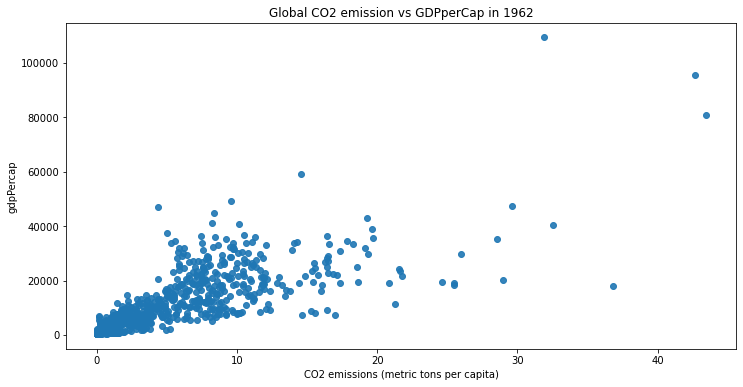

In [35]:
my_data_1962 = my_data[my_data.Year == 1962]
#Extract the attributes
data_1962 = my_data[["CO2 emissions (metric tons per capita)", "gdpPercap"]]
data_1962 = data_1962.dropna()  # drop rows containing missing data

#Plot function from matplotlib
x = data_1962["CO2 emissions (metric tons per capita)"]
y = data_1962["gdpPercap"]

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.9)
plt.xlabel("CO2 emissions (metric tons per capita)")
plt.ylabel("gdpPercap")
plt.title("Global CO2 emission vs GDPperCap in 1962")
plt.show()


## Question 2
### Pearson Correlation of `CO2 emissions and GDP per capita.`
On the filtered data, calculate the pearson correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the Pearson R value and associated p value?

Detemining the pearson R and P values!

Pearson correlation is the measure of strength of linear association between two variables and is denotated by *r*. <br>
When:  <br>
    *r=0* - no correlation <br>
    *r>0* - positive correlation  <br>
    *r<0* - negative correlation  <br>

The `pearsonr()` from `scipy` library will be used in here. 
`x` is the `CO2 emissions` and `y` is `GDP per capita`
links
[correlations](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)


In [36]:
data = my_data_1962[["CO2 emissions (metric tons per capita)", "gdpPercap"]] #Get the datasets
data = data.dropna() #drop rows with missing data
corr, pvalue = pearsonr(
    data["CO2 emissions (metric tons per capita)"], data["gdpPercap"])
print("The pearson's correlation is", round(corr,3), "and a p-value of", round(pvalue, 2))

The pearson's correlation is 0.926 and a p-value of 0.0


The pearson's correlation is `0.926` and a p-value of pretty much `0`. There exists a strong positive correlation between `C02 emissions` and `GDP per capita` 

## Question 3
### Determine year with maximum correlation <br>
On the unfiltered data, answer <br> "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step.

### Approach
Extract the respective features from main data <br>
Determine pearson's correlation for each year <br>
Identify year with maximum correlation <br>

In [37]:
#drop rows with# nans
data_all = my_data[["continent", "Year", "pop",
                    "CO2 emissions (metric tons per capita)", "gdpPercap"]]
                    
data_all = data_all.dropna()

period = data_all["Year"].unique() #Get a list of the periods

#create a dict of each year and respective observations for year in period:
df_dict = {}
for year in period:
    df_dict[year] = data_all[data_all["Year"] == year]
#df_dict

xy_dict = {} #create a dict of year and necessary columns
for year in period:
   xy_dict[year] = df_dict[year]["CO2 emissions (metric tons per capita)"], df_dict[year]["gdpPercap"]

correlation_data = {} #dictionary of the correlation values and years
for year in xy_dict:
    corr,_ = pearsonr(xy_dict[year][0], xy_dict[year][1])
    correlation_data[year] = corr

correlation_data_df = pd.DataFrame(list(correlation_data.items())) #create a table (data frame)

correlation_data_df.columns = ["Year","pearsonr_correlation"] #rename the columns

print(correlation_data_df)

#determine year with maximum correlation.
year_max_correlation = max(correlation_data,key=correlation_data.get)
max_correlation = max(correlation_data.values())
print(" Year with maximum correlation is", year_max_correlation, "with a correlation of ~", "{:.2f}".format(max_correlation))


   Year  pearsonr_correlation
0  1962              0.926082
1  1967              0.938792
2  1972              0.842899
3  1977              0.792834
4  1982              0.816638
5  1987              0.809553
6  1992              0.809432
7  1997              0.808140
8  2002              0.800642
9  2007              0.720417
 Year with maximum correlation is 1967 with a correlation of ~ 0.94


## Question 4

Filter Dataset to the year with highest correlation and create a scatter plot between `CO2 emission` and `gdpPaCap` <br>
Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

In [38]:
pltly.offline.init_notebook_mode(connected=True)
data_1967 = my_data[my_data["Year"] == 1967]
corr_data = data_1967[[
    "pop", "continent", "CO2 emissions (metric tons per capita)", "gdpPercap"]]
corr_data = corr_data.dropna()  # the data has missing data which we drop here

fig = pltx.scatter(corr_data,
                   x="CO2 emissions (metric tons per capita)",
                   y="gdpPercap",
                   color="continent",
                   size="pop")
fig.update_yaxes(range=[0, 25000])
fig.update_xaxes(range=[0, 20])

fig.show()


## Question 5
Now, without further guidance, use your Python Data Science skills (and the correct statistical tests) to answer the following:
What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)

### Approach
Visualize the trends and average energy use per continent <br>
Perform an ANOVA test to compare the means <br>
Check which pairs have signinficant differences: T-test <br>

In [39]:
pltly.offline.init_notebook_mode(connected=True)
energy_data = my_data[["continent", "Year",
                       "Energy use (kg of oil equivalent per capita)"]]

energy_data = energy_data.pivot_table(
    index=["Year"], columns="continent").droplevel(0, axis=1)
energy_data = energy_data.reset_index(drop=False, inplace=False)

#Lets view the data as time-series
fig = pltx.line(energy_data, x="Year", y=energy_data.columns)
fig.update_yaxes(title="Energy consumption (Kg)")
fig.show()



In [40]:
#Relationship between continent vs Energy used.
#Calculate mean consumption for each continent
pltly.offline.init_notebook_mode(connected=True)
energy_data = my_data[["continent", "Year",
                       "Energy use (kg of oil equivalent per capita)"]]
#remove missing data
energy_data = energy_data.dropna()

#Calculate mean consumption for each column
mean_dictionary = {}

for i in energy_data["continent"].unique():
    mean = energy_data[energy_data["continent"] == i]["Energy use (kg of oil equivalent per capita)"].mean()
    mean_dictionary[i] = mean

mean_dictionary_df = pd.DataFrame(list(mean_dictionary.items()))
mean_dictionary_df.columns = ["continent","Average energy consumption (Kg)"]

fig = pltx.bar(mean_dictionary_df,
               y="Average energy consumption (Kg)",
               x="continent",
               orientation="v",
               color="continent",
               width=600,
               height=700,
               title="Average Energy consumption by Continent (Kg)"
               )
fig.show()


Generally, Oceania continent has highest consumption rate which has increased steadly overtime. <br>

African continent showed the least energy consumption. <br>

Suprisingly, the Americas had the highest consumption rate in the first decade, which declined drastically.

ANOVA test.

In [41]:
#perform ANOVA test for each one the groups using stats function

energy_data = my_data[["continent", "Year",
                       "Energy use (kg of oil equivalent per capita)"]]

energy_data = energy_data.pivot_table(
    index=["Year"], columns="continent").droplevel(0, axis=1)
energy_data = energy_data.reset_index(drop=False, inplace=False)

energy_data.set_index("Year",inplace=True)

energy_data = energy_data.dropna(axis=0)

stats.f_oneway(energy_data.Africa, energy_data.Americas, energy_data.Europe, energy_data.Oceania, energy_data.Asia)


F_onewayResult(statistic=112.81589721019708, pvalue=1.7277557507344105e-19)

F_statistic results to  a P-value of 0.001. <br>

There exists significant difference in the energy consumption between the continents. <br>

But which of the groups is causing this huge difference. Perform a T-test on each pair <br>

Following [this tutorial](https://youtu.be/EWYzeZbchR0)

In [42]:
cont_pairs = [] #create a pair of the continents

for cont1 in range(len(energy_data.columns)):
    for cont2 in range(cont1+1,5):
        cont_pairs.append((energy_data.columns[cont1], energy_data.columns[cont2]))



#condut t-test on each pair of continent
for cont1, cont2 in cont_pairs:
    print(cont1,cont2)
    print(stats.ttest_ind(energy_data[cont1], energy_data[cont2]))
    print("---------------------")


Africa Americas
Ttest_indResult(statistic=-10.095518054451242, pvalue=8.302650508548604e-08)
---------------------
Africa Asia
Ttest_indResult(statistic=-6.849792161086915, pvalue=7.936511465962737e-06)
---------------------
Africa Europe
Ttest_indResult(statistic=-25.912928607786142, pvalue=3.1331210345627216e-13)
---------------------
Africa Oceania
Ttest_indResult(statistic=-16.959912428377212, pvalue=9.922525623508251e-11)
---------------------
Americas Asia
Ttest_indResult(statistic=-1.24804520333598, pvalue=0.23248519359596806)
---------------------
Americas Europe
Ttest_indResult(statistic=-12.732090528322205, pvalue=4.357852010764935e-09)
---------------------
Americas Oceania
Ttest_indResult(statistic=-11.642184649782545, pvalue=1.3781358722699321e-08)
---------------------
Asia Europe
Ttest_indResult(statistic=-7.55961742663124, pvalue=2.6304650464260018e-06)
---------------------
Asia Oceania
Ttest_indResult(statistic=-9.018066943377617, pvalue=3.3073646968758266e-07)
------

A T_test between the continents indicate presence of **significant difference in Energy consumption** between the continents **except** between the **Americas and Asian** continents which have lower p-value.

## Questation 6
Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

### Approach

Determine the difference in means of imported goods (t-test). T-test inferes significant difference between the two means

[reading from here](https://www.investopedia.com/terms/t/t-test.asp)[here](https://www.statology.org/paired-vs-unpaired-t-test/) and [here](https://www.youtube.com/watch?v=CIbJSX-biu0)

Perform a two sample hypothesis testing. Null Hypothesis will be *There is no significant difference on goods and services imported between Asia and Europe* i.e means of both groups are the same, (m1=m2).

Since these samples are unpaired, an independent t-test will suffice. Check for homogeinity of variance between the samples using [levene](https://www.scalestatistics.com/levenes-test.html) t-test. Many statistical tools make assumptions that groups do have equal variances, and levenes test allows you to determine whether this assumptoin is true. If p-value is >.05,homogeinity in variance exists (equal variances), else different variances


In [43]:
#my_data.head()
imports_data = my_data[["continent","Year",
                        "Imports of goods and services (% of GDP)"]]
continent = ["Asia","Europe"]
imports_data = imports_data.loc[imports_data["continent"].isin(continent)].loc[imports_data["Year"] > 1990] # select data past 1990
imports_data = imports_data.dropna()

#Get data for each continent
Europe = imports_data[imports_data["continent"] == "Europe"]["Imports of goods and services (% of GDP)"]
Asia = imports_data[imports_data["continent"] == "Asia"]["Imports of goods and services (% of GDP)"]

#We comparing differences between two independendt groups making this suitable for unpaired t-test
#Check whether there exists variation between the samples using leven test (homogeinity of variance)

variance = stats.levene(Asia, Europe)
print(variance) #gives a p-value of < .05. No variance exists

#Run the t-test
res = stats.ttest_ind(a=Europe,b=Asia,equal_var=False) 
res

LeveneResult(statistic=14.492912922394103, pvalue=0.00018461387781129707)


Ttest_indResult(statistic=-1.3552198505869248, pvalue=0.1775691189807683)

Levene's Test gives a p-value of < .05 (0.00018), hence no variance homogeinity between the groups. The independent T-test results to a p-value of > 0.05 (0.1775).
There exists NO significant difference in goods and services imported between Europe and Asia.

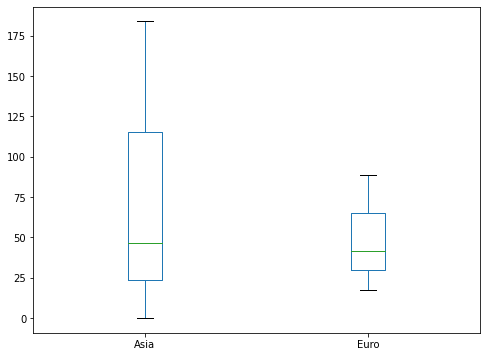

In [44]:
#Visualize the metrics of the dataset with whiscker plot
euro = [Europe.min(), Europe.mean(), Europe.max()]
asia = [Asia.min(), Asia.mean(), Asia.max()]
rowlabs = ["min","mean","max"]
data = pd.DataFrame({"Asia": asia, "Euro": euro}, index=rowlabs)

fig = plt.figure(figsize=(8,6))
data.boxplot(grid=False)
plt.show()

No difference between Asia and Europe. Equal means and Europe is submerged within Asia.

## Question 7
What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

### Approach
Extract the Year, country name and population density data from the main dataset \
Select and tabulate countries with the highest 'Population density (people per sq. km of land area)' by Year \
Perform a graphical plot of the results 

In [45]:
#my_data.head()
pop_dns = my_data[["Year","Country Name",
                   "Population density (people per sq. km of land area)"]]

pop_dns = pop_dns.pivot_table(index="Country Name", columns="Year").droplevel(
    0, 1).reset_index(drop=False, inplace=False)
pop_dns = pop_dns.dropna() #drop countries with missing data
pop_dns.set_index("Country Name",inplace=True)

pop_dns = pop_dns.round(decimals=6)  # format float decimals for readability

Years = pop_dns.columns
density = []
for i in Years:
  # select maximum population density from each year and the associated countries
  density.append(
      [i, pop_dns[i].max(), pop_dns.index[pop_dns[i] == pop_dns[i].max()].to_list()])

# make a dataframe from the list
density = pd.DataFrame(density, columns=("year", "pop density", "country"))
density["country"].astype('string')
density


,year,pop density,country
0,1962,11521.000000,[Monaco]
1,1967,11648.500000,[Monaco]
2,1972,12714.100000,"[Macao SAR, China]"
3,1977,12904.500000,[Monaco]
4,1982,13814.500000,[Monaco]
5,1987,16132.750000,"[Macao SAR, China]"
6,1992,18889.950000,"[Macao SAR, China]"
7,1997,20601.550000,"[Macao SAR, China]"
8,2002,16451.037037,"[Macao SAR, China]"
9,2007,17523.000000,[Monaco]


In [46]:
#Visualize density for the top countries
pltly.offline.init_notebook_mode(connected=True)
fig = pltx.bar(density,
               y="pop density",x="year", color=density["country"].astype('string'), width=800, height=700,
               title="Country with highest Population density across years"
               )
fig.update_xaxes(categoryorder = "total ascending") #linear, category, multicategory,date,log
fig.show()


**Monaco** and **Macao SAR China** are the two countries with leading 'Population density (people per sq. km of land area)' in each Year

## Question 8
What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' since 1962?

## Approach

Find the difference between the last and the first years i.e 2007 and 1962 \
Find the top 5 countries with highest increase \
Do a plot.

In [47]:
expectancy_data = my_data[["Country Name","Year", "Life expectancy at birth, total (years)"]]

expectancy_data = expectancy_data.pivot_table(index="Year", columns="Country Name").droplevel(
    0, 1).reset_index(drop=False, inplace=False)

expectancy_data = expectancy_data.dropna(axis=1) #remove countries with missing data
expectancy_data.set_index("Year", inplace=True)

increase = { } #dictionary for country and difference in life expectancy between 1962 and 2007
country = expectancy_data.columns
for i in country:
    increase[i] = round(expectancy_data[i].iloc[-1] - expectancy_data[i].iloc[0],3)

great_increase = list(increase.items())

increase_data = pd.DataFrame(great_increase, columns = ("country", "difference")) #convert to dataframe
increase_data = increase_data.sort_values("difference", ascending=False) #Sort the dataframe in descending order

increase_data.head(n=5) #Find the top 5 countries with highest increase in life expectancy

,country,difference
136,Maldives,36.916
20,Bhutan,33.199
213,Timor-Leste,31.085
217,Tunisia,30.861
164,Oman,30.823


Country with the highest increase in Life expectancy is Maldives. \
The plot below shows top 5 countries with increase in Life expectancy

In [48]:
#Graphical display 
pltly.offline.init_notebook_mode(connected=True)
fig = pltx.bar(increase_data.head(n=5),
               x="difference", y="country",
               title = "Top 5 countries with highest increase in Life expectancy",
               width = 800,height=400)
fig.update_yaxes(categoryorder="total ascending")
fig.update_xaxes(title = "Life expectancy increase")
fig.show()
